# TN Motor Vehicle Registrations
- Acquired from TN Department of Revenue by [records request](https://www.tn.gov/revenue/about-us/contact-us/public-records-request.html) under Tennessee Public Records Act
- Notes:
    - Requested registration years 2018-2022

## Environment

In [1]:
# packages
import numpy as np
import pandas as pd
import time
import pyarrow

## Data Load

In [2]:
# tennesee mvr data

df = pd.read_parquet('data/tn_mvr_2018-2022.parquet', engine='pyarrow')

print(df.shape)
print('df obs: ',f"{df.shape[0]:,d}")

(9831774, 13)
df obs:  9,831,774


In [3]:
# set dates dtype
df['title_issue_date'] = pd.to_datetime(df['title_issue_date'],format='%Y-%m-%d')
df['purchase_date'] = pd.to_datetime(df['purchase_date'],format='%Y-%m-%d', errors='coerce') # coerce errors to NaT


In [4]:
df.info(show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9831774 entries, 0 to 9831773
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   vin               string        
 1   price             Float32       
 2   odometer_type     category      
 3   mileage           Int32         
 4   county            category      
 5   zip               string        
 6   model_year        Int16         
 7   make              string        
 8   model             string        
 9   vehicle_type      category      
 10  new_used          category      
 11  title_issue_date  datetime64[ns]
 12  purchase_date     datetime64[ns]
dtypes: Float32(1), Int16(1), Int32(1), category(4), datetime64[ns](2), string(4)
memory usage: 609.5 MB


## Basic Data Info

In [5]:
df.nunique()

vin                 7558172
price                320152
odometer_type             5
mileage              262520
county                   97
zip                    5968
model_year              132
make                   8580
model                 24683
vehicle_type             16
new_used                  2
title_issue_date       5940
purchase_date         12973
dtype: int64

In [6]:
# data sample
df.sample(5).T

,vin,price,odometer_type,mileage,county,zip,model_year,make,model,vehicle_type,new_used,title_issue_date,purchase_date
2509654,1FTMF1EM5DKD33953,0.0,0,58130,Sumner,37148,2013,FORD,F15,TRUCK,U,2018-07-05,2018-06-07
2341382,1JJV532D8ML268699,0.0,1,0,Hamilton,63105,2021,WABA,1JJ,FREIGHT/SEMI TRAILER,N,2020-04-16,2020-03-02
9572660,3C6TRVDGXLE141894,39252.0,0,15,Montgomery,37040,2020,RAM,PRM,AUTO,N,2020-12-08,2020-10-24
8339671,JTEBU5JR0F5217708,28146.0,0,91731,Williamson,37069,2015,TOYT,4RN,AUTO,U,2021-07-12,2021-06-04
4604572,1GTN2VE09BZ343376,0.0,0,104937,Maury,37091,2011,GMC,1NK,TRUCK,U,2021-11-16,2021-10-19


In [7]:
# numeric
df.describe().round(decimals = 1)

,price,mileage,model_year
count,9.500230e+06,9.831773e+06,9831774.0
mean,2.162218e+06,3.994310e+04,2010.4
std,2.792438e+09,4.452238e+06,9.9
min,-7.000000e+00,-2.256996e+08,1005.0
25%,0.000000e+00,0.000000e+00,2005.0
50%,0.000000e+00,1.000000e+01,2013.0
75%,1.000000e+03,4.314500e+04,2018.0
max,8.118003e+12,2.147484e+09,2890.0


In [8]:
# non-numeric
df.describe(include = ['object','category'])

,odometer_type,county,vehicle_type,new_used
count,9831774,9831774,9831774,9831774
unique,5,97,16,2
top,0,State,AUTO,U
freq,5185393,1086116,6973439,7907848


In [9]:
# dates
df.describe(include = ['datetime'], datetime_is_numeric=True)

,title_issue_date,purchase_date
count,9830879,9831203
mean,2020-07-08 19:08:27.796668416,2020-02-19 13:33:20.368216320
min,1971-06-12 00:00:00,1720-02-08 00:00:00
25%,2019-04-23 00:00:00,2019-01-15 00:00:00
50%,2020-07-29 00:00:00,2020-05-01 00:00:00
75%,2021-10-04 00:00:00,2021-07-23 00:00:00
max,2022-12-30 00:00:00,2220-03-07 00:00:00


## Filter Used Autos and Trucks

In [ ]:
# vehicle types
print(df['vehicle_type'].value_counts(dropna=False))

In [10]:
# filter to auto/truck only
print(f'all obs: {df.shape[0]:,d}')
df.drop(df[~df['vehicle_type'].isin(['AUTO','TRUCK'])].index, inplace=True)
print(f'auto/truck only obs: {df.shape[0]:,d}')

AUTO                    6973439
TRUCK                   1747741
FREIGHT/SEMI TRAILER     377792
MOTORCYCLE               302363
UTILITY (BOX/CARGO)      118689
CAMPER TRAILER           101051
OTHER                     72108
MOBILE HOME/HOUSE TR      53421
UTILITY (FLAT BED) T      45123
RECREATION/MOTOR HOM      20453
BUS - COMMERCIAL           8075
LIVESTOCK/HORSE TRAI       6226
WATERCRAFT TRAILER         3106
SCHOOL BUS                 2146
Multipurpose Vehicle         22
VAN                          19
Name: vehicle_type, dtype: int64

auto/truck only obs: 8,721,180


In [ ]:
# new / used
print(df['new_used'].value_counts(dropna=False))

In [11]:
# filter to used only
print(f'all obs: {df.shape[0]:,d}')
df.drop(df[df['new_used'] == 'N'].index, inplace=True)
print(f'used only obs: {df.shape[0]:,d}')


U    7290817
N    1430363
Name: new_used, dtype: int64

used only obs: 7,290,817


## VINs

Duplicate VINs need to be worked on

In [12]:
print('obs: {0:,d}'.format(df.shape[0]))
print('unique vins: {0:,d}'.format(df['vin'].unique().shape[0]))

obs: 7,290,817
unique vins: 5,166,228


## Join with Other Datasets

### CarGurus Scrape

In [ ]:
import pandas as pd
iter_csv = pd.read_csv('data/cargurus.csv', iterator=True, chunksize=1000)
df = pd.concat([chunk[chunk['field'] > constant] for chunk in iter_csv])

### MarketCheck

In [ ]:
# marketcheck listings data
mc = pd.read_csv('data/marketcheck_kaggle.csv'
                ,usecols=['vin','year','state','make','model','miles','price']
                ,dtype={'vin':'string','year':'Int16','state':'category','make':'category','model':'string','miles':'Int32','price':'Int32'}
                ,low_memory=False)

In [ ]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7104304 entries, 0 to 7104303
Data columns (total 7 columns):
 #   Column  Dtype   
---  ------  -----   
 0   vin     string  
 1   price   Int32   
 2   miles   Int32   
 3   year    Int16   
 4   make    category
 5   model   string  
 6   state   category
dtypes: Int16(1), Int32(2), category(2), string(2)
memory usage: 210.0 MB


In [ ]:
mc.nunique()

vin      2387394
price      71062
miles     224627
year          43
make          66
model       1346
state         58
dtype: int64

In [ ]:
df2 = df.join(mc, on='vin', how='left', rsuffix='_mc')

In [ ]:
df2[~df2['vin_mc'].isna()]

,vin,price,odometer_type,mileage,county,zip,model_year,make,model,vehicle_type,new_used,title_issue_date,purchase_date,vin_mc,price_mc,miles,year,make_mc,model_mc,state


## Prices

Have got some price issues
- Lots of missing with 0 filler
- Very high values

In [14]:
num = df.shape[0]
print('total obs: ',f"{num:,d}")

num = (df['price'] < 0.1).sum()
print('0 prices: ',f"{num:,d}")

num = (df['price'] > 10000).sum()
print('prices > 10,000: ',f"{num:,d}")

num = ((df['price'] > 0.1) & (df['price'] < 10000)).sum()
print('prices between: ',f"{num:,d}")

total obs:  7,290,817
0 prices:  3,972,161
prices > 10,000:  697,776
prices between:  2,279,048


<AxesSubplot:>

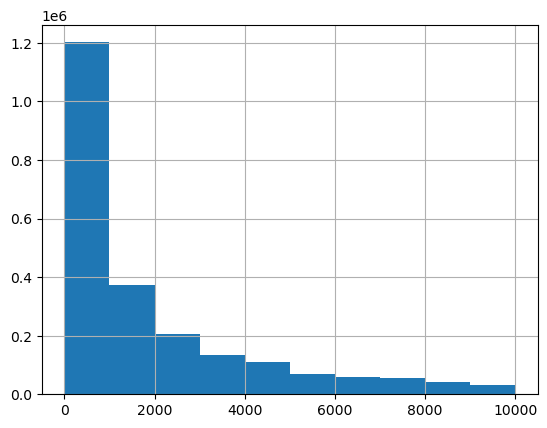

In [15]:
# hist prices between $0.1 and $10,000
df[((df['price'] > 0.1) & (df['price'] < 10000))]['price'].hist()

### High Prices

In [16]:
pd.set_option('display.max_rows', 100)

In [17]:
df.sort_values(by='price', ascending=False).head(50).reset_index()

,index,vin,price,odometer_type,mileage,county,zip,model_year,make,model,vehicle_type,new_used,title_issue_date,purchase_date
0,5324810,5XXGM4A74DG239514,8118003040256.0,0,116413,Sumner,37075,2013,KIA,OPT,AUTO,U,2021-12-10,2021-10-02
1,139903,1B3HB48C77D547130,940119425024.0,1,0,Williamson,37064,2007,DODG,CXT,AUTO,U,2020-05-11,2020-05-09
2,5300816,1G1PC5SH9B7253911,860218589184.0,0,163038,Unicoi,37601,2011,CHEV,CZL,AUTO,U,2020-03-25,2020-02-28
3,3732587,3GCUKSEJ8HG144346,831182995456.0,0,92139,Sumner,37075,2017,CHEV,SLV,TRUCK,U,2020-09-01,2020-07-28
4,6934261,W06VR52R7XR008155,831182995456.0,1,0,Sumner,37075,1999,CADI,CAT,AUTO,U,2021-03-03,2021-02-01
5,6707548,3C6TR5MT0FG505486,791179034624.0,0,113,Shelby,38133,2015,RAM,250,TRUCK,U,2020-09-17,2020-08-11
6,6489136,JTEES42A582069565,791179034624.0,1,0,Shelby,38133,2008,TOYT,HGH,AUTO,U,2019-06-18,2019-06-05
7,9337173,WBXPC934X8WJ06914,791179034624.0,1,0,Shelby,38118,2008,BMW,X3,AUTO,U,2020-06-08,2020-06-05
8,466116,1D7HA18P47S257562,790217883648.0,1,0,Shelby,38002,2007,DODG,RAM,TRUCK,U,2021-03-29,2021-03-29
9,3757614,2T1CG22P5YC328627,720117170176.0,1,0,Rhea,37332,2000,TOYT,CAM,AUTO,U,2020-09-03,2018-12-11


<AxesSubplot:>

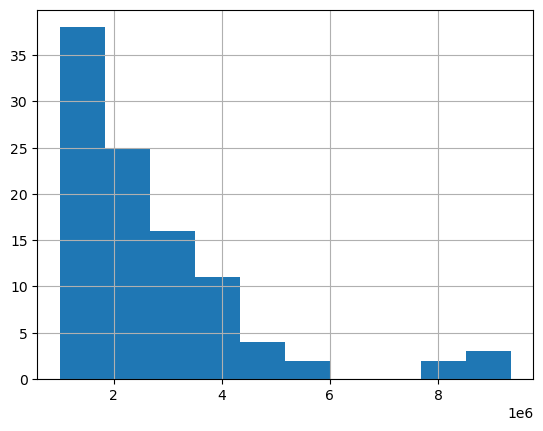

In [ ]:
# between $1m and $10m
condition_low = df['price'] > 1000000
condition_high = df['price'] < 10000000
df[condition_low & condition_high]['price'].hist()

I suspect some counties are adding zeros for decimal

- 1m = $10,000.00
- 10m = $100,000.00

### Distributions by County

In [20]:
# mean prices by county

nums = df.groupby('county')['price'].mean().sort_values(ascending=False)
index = nums.index

for i in range(len(nums)):
    print("{}: ${:0,.2f}".format(index[i],nums[i]))

Sumner: $65,039,780.00
Unicoi: $42,629,816.00
Greene: $21,020,718.00
Rhea: $19,698,620.00
Williamson: $5,504,215.00
Madison: $5,126,476.50
Shelby: $5,018,479.00
Davidson: $313,903.78
Knox: $12,465.07
Fayette: $11,335.27
Dyer: $10,279.17
Tipton: $10,272.22
Henry: $9,804.82
Gibson: $9,804.49
Henderson: $9,434.28
Anderson: $9,425.70
Washington: $9,416.22
Bedford: $9,312.57
Hardin: $9,252.50
Hardeman: $9,195.68
Roane: $8,739.39
Crockett: $8,098.24
Lauderdale: $8,063.53
Cheatham: $7,803.85
Carroll: $7,603.21
McNairy: $7,214.13
Chester: $6,731.81
Wayne: $6,098.51
Houston: $6,032.91
Lake: $6,013.06
Polk: $5,872.87
Bledsoe: $5,687.14
Trousdale: $5,655.52
Dekalb: $5,611.52
Moore: $5,433.33
Humphreys: $5,300.61
Smith: $5,296.35
Macon: $5,201.29
Hamblen: $4,790.07
Meigs: $4,540.94
Johnson: $4,518.95
Claiborne: $4,495.70
Fentress: $4,337.81
Jackson: $4,280.34
Van Buren: $4,279.90
Campbell: $4,214.69
Clay: $4,174.17
Pickett: $3,870.86
Hickman: $3,597.12
Carter: $3,503.78
Loudon: $3,429.89
Lincoln: 

In [19]:
# median prices by county

nums = df.groupby('county')['price'].median().sort_values(ascending=False)
index = nums.index

for i in range(len(nums)):
    print("{}: ${:0,.2f}".format(index[i],nums[i]))

Fayette: $3,290.85
Gibson: $3,000.00
Dyer: $3,000.00
Tipton: $3,000.00
Hardeman: $2,500.00
Henry: $2,500.00
Bedford: $2,500.00
Crockett: $2,361.00
Lauderdale: $2,099.50
Madison: $2,000.00
Hardin: $2,000.00
Washington: $2,000.00
McNairy: $1,650.00
Henderson: $1,500.00
Carroll: $1,500.00
Unicoi: $1,200.00
Trousdale: $1,000.00
Wayne: $1,000.00
Houston: $1,000.00
Humphreys: $1,000.00
Macon: $1,000.00
Moore: $1,000.00
Dekalb: $1,000.00
Cheatham: $1,000.00
Polk: $1,000.00
Roane: $1,000.00
Chester: $900.00
Lake: $800.00
Union: $700.00
Smith: $600.00
Clay: $550.00
Meigs: $500.00
Perry: $500.00
Van Buren: $500.00
Jackson: $500.00
Hickman: $500.00
Anderson: $500.00
Cannon: $500.00
Grundy: $500.00
Fentress: $500.00
Bledsoe: $500.00
Giles: $400.00
Sequatchie: $300.00
Hamblen: $300.00
Lewis: $300.00
Johnson: $300.00
Grainger: $300.00
Campbell: $250.00
Marshall: $250.00
Hancock: $200.00
McMinn: $200.00
Claiborne: $200.00
Pickett: $200.00
Carter: $200.00
Overton: $150.00
Sevier: $100.00
Morgan: $100.

In [22]:
groups = df.groupby('county')

for name, group in groups:
    print(name)
    print(group['price'].describe().round(decimals = 1))

Anderson
count       105100.0
mean          9425.7
std         308981.1
min              0.0
25%              0.0
50%            500.0
75%          13500.0
max      100000000.0
Name: price, dtype: float64
Bedford
count      63563.0
mean        9312.6
std        38302.8
min            0.0
25%          300.0
50%         2500.0
75%        13884.1
max      4521578.0
Name: price, dtype: float64
Benton
count     18526.0
mean       2338.5
std        7196.4
min           0.0
25%           0.0
50%         100.0
75%        1000.0
max      196085.0
Name: price, dtype: float64
Bledsoe
count      12038.0
mean        5687.1
std        17721.0
min            0.0
25%            0.0
50%          500.0
75%         4000.0
max      1500272.0
Name: price, dtype: float64
Blount
count    143574.0
mean       2244.5
std        8475.3
min           0.0
25%           0.0
50%           0.0
75%         600.0
max      936676.0
Name: price, dtype: float64
Bradley
count     119405.0
mean        2781.9
std        1816

## The Rest

In [19]:
# null counts
pd.DataFrame({'count':df.isna().sum()
             ,'percent':(df.isna().sum()/df.shape[0]).round(decimals=2)}
    ).sort_values(by='count', ascending=False)

,count,percent
price,323622,0.04
title_issue_date,532,0.00
purchase_date,331,0.00
model,215,0.00
vin,0,0.00
odometer_type,0,0.00
mileage,0,0.00
county,0,0.00
zip,0,0.00
model_year,0,0.00


In [20]:
# 0 or filler counts